### 학과: IT미디어공학과
### 학번: 20191035
### 이름 : 장혜림

## Chap2. 전세계 음주 데이터 분석하기

In [ ]:
%matplotlib inline

### <Step1. 탐색> 데이터의 기초 정보 살펴보기

[1.1] drinks 데이터셋의 기초 정보 출력하기

In [ ]:
# 로컬 디스크 데이터를 가져오기 위해 google.colab에서 files라는 package를 import한다.
from google.colab import files

# files.upload()에 의해 [파일 선택] 버튼이 생성된다.
uploaded = files.upload()

Saving drinks.csv to drinks.csv


In [ ]:
# 필요한 라이브러리들을 임포트한다.
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read_csv()으로 업로드된 파일을 Byte단위로 읽어서 drinks 데이터프레임을 생성한다.
drinks = pd.read_csv(io.BytesIO(uploaded['drinks.csv'])) 

# info()로 데이터의 기초 정보 출력하기
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [ ]:
# drinks 데이터프레임의 상위 10개행을 출력한다.
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [ ]:
# describe()로 수치형 피처들의 기초 통계량을 확인한다.
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


-----

### <Step2. 인사이트의 발견> : 탐색과 시각화

[2.1] 두 피처간의 상관계수 구하기



In [ ]:
## drinks 데이터프레임의 beer_servings 피처와 wine_servings 피처의 상관계수를 구하시오
## pearson 방식을 사용하시오. 
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


[2.2] 여러 피처의 상관관계 분석하기

In [ ]:
## 여러개의 피처들을 1대1로 비교하여 피처간의 상관계수 행렬을 구하시오
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
print(corr)

                              beer_servings  ...  total_litres_of_pure_alcohol
beer_servings                      1.000000  ...                      0.835839
spirit_servings                    0.458819  ...                      0.654968
wine_servings                      0.527172  ...                      0.667598
total_litres_of_pure_alcohol       0.835839  ...                      1.000000

[4 rows x 4 columns]


[2.3] 상관 관계를 히트맵(heatmap)그래프로 시각화하기

In [ ]:
# seaborn 시각화 라이브러리를 설치한다.
# !는 주피터 노트북에서 OS명령을 실행한다.
!pip install seaborn

In [ ]:
# seaborn 라이브러리를 sns 약칭으로 임포트한다.
import seaborn as sns

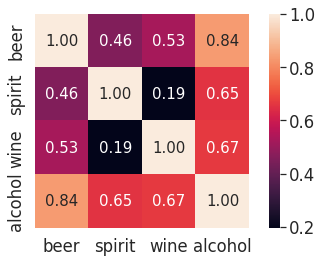

In [ ]:
# corr 행렬 히트맵을 시각화한다.
# x축, y축 label을 위해 컬럼이름을 축약한다.
cols_view = ['beer', 'spirit', 'wine', 'alcohol']

sns.set(font_scale=1.5) # 레이블 폰트 사이즈 조정

## corr 행렬을 히트맵으로 그리시오
hm = sns.heatmap(corr.values, # 상관계수 행렬값
            cbar=True,  # colorbar의 유무
            annot=True, # 각 cell의 값 표기 유무
            square=True, # 정사각형 표시 유무
            fmt='.2f', # 표시할 값의 format으로 소수점이하 2자리 float형
            annot_kws={'size': 15}, # 표시할 값의 keywords 폰트 사이즈는 15
            yticklabels=cols_view, # y축 레이블을 축약한 컬럼이름 사용
            xticklabels=cols_view) # x축 레이블을 축약한 컬럼이름 사용

plt.tight_layout() # 창 크기에 맞게 조정
plt.show()

### <Step3. 탐색적 분석> : 스무고개로 분석하는 개념적 탐색

[3.1] continent 컬럼의 결측데이터(NaN: Not a Number)전처리

In [ ]:
## drinks 데이터프레임의 각 피처의 null의 갯수를 출력하시오
print(drinks.isnull().sum())

print("------------------------------------")
print(drinks.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
------------------------------------
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [ ]:
## drinks 데이터프레임의 대륙(continent) 컬럼의 결측데이터를 기타대륙(Others:OT)으로 변환하시오.
drinks['continent'] = drinks['continent'].fillna('OT')

In [ ]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


[3.2] 파이차트로 시각화하기
 * 전체 대륙 중에서 'OT'가 차지하는 비율이 얼마나 되는지 파이차트로 확인한다.
 * 파이차트 (Pie chart, 원그래프)는 범주별 구성 비율을 원형으로 표현한 그래프이다.

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64
['AF', 'EU', 'AS', 'OT', 'OC', 'SA']
[53, 45, 44, 23, 16, 12]


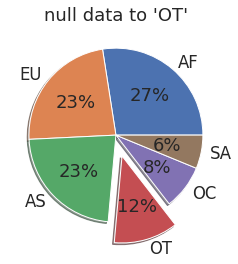

In [ ]:
## 파이차트의 범주(labels)를 구한다.
## drinks 데이터프레임의 대륙(continent) 피처의 값별 개수를 구하고 인덱스를 리스트로 변환하시오
labels = drinks['continent'].value_counts().index.tolist()
print(drinks['continent'].value_counts())
print(labels)

## 파이차트의 구성비율(fracs1)을 구한다.
## drinks 데이터프레임의 대륙(continent) 피처의 값별 개수를 구하고 값들을 리스트로 변환하시오
fracs1 = drinks['continent'].value_counts().values.tolist()
print(fracs1)

# 부채꼴이 파이차트의 중심에서 벗어나는 정도를 지정한다.
# 'OT'가 value_counts() 결과의 4번째이고 25% 중심에서 돌출된다.
explode = (0, 0, 0, 0.25, 0, 0)

# 파이차트 그래프 객체를 생성한다.
# autopct=자동백분율로 '%.0f%%' 형식으로 %를 표시한다. 
# shadow=True 원의 그림자가 표시되게 한다.
plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

[3.3] 그룹 단위의 데이터 분석 : 대륙별 분석
 * agg( )를 사용하여 대륙 단위로 분석한다.
 * agg()는 파라메터를 병렬로 설정하여 그룹에 대한 여러가지 연산 결과를 동시에 얻을수 있는 함수이다.
 * 대륙별 'spirit_servings'의 통계적 정보를 구하기 위해 agg()에 ['mean', 'min', 'max', 'sum'] 파라메터를 준다

In [ ]:
## drinks 데이터프레임의 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 구하시오.
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


[3.4] 전체 평균보다 많은 알코올을 섭취하는 대륙은 어디일까?

In [ ]:
## drinks 데이터프레임의 총알코올소비량(total_litres_of_pure_alcohol)의 평균을 구하시오
total_mean = drinks.total_litres_of_pure_alcohol.mean()
print(total_mean)

## drinks 데이터프레임의 대륙(continent)별 총알코올소비량(total_litres_of_pure_alcohol)의 평균을 구하시오
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
print(continent_mean)

## 대륙별 총알코올소비량에서 전체 총알코올소비량의 평균보다 많은 대륙을 구하시오
continent_over_mean = continent_mean[continent_mean >= total_mean] 
print(continent_over_mean)

4.717098445595855
continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64
continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


[3.5] 평균 beer_servings가 가장 높은 대륙은 어디일까?

In [ ]:
## drinks 데이터프레임의 대륙(continent)별 맥주소비량(beer_servings)의 평균에서
##  값이 가장 큰 index를 반환하시오
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()

print(drinks.groupby('continent').beer_servings.mean())
print('---------------------------------')
print(beer_continent)

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
OT    145.434783
SA    175.083333
Name: beer_servings, dtype: float64
---------------------------------
EU


-----

[3.6] 분석 결과 시각화하기

                 mean  min  max   sum
continent                            
AF          16.339623    0  152   866
AS          60.840909    0  326  2677
EU         132.555556    0  373  5965
OC          58.437500    0  254   935
OT         165.739130   68  438  3812
SA         114.750000   25  302  1377


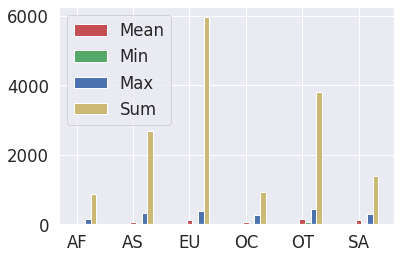

In [ ]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화합니다.
print(result)
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

# arange(6)으로 index를 만든다.
index = np.arange(n_groups)
bar_width = 0.1
 
# Mean 막대 그래프 객체를 생성한다.
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
# bar_width만큼 떨어진 위치에 Min 막대그래프 객체를 생성한다.
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')
# bar_width*2 만큼 떨어진 위치에 Max 막대그래프 객체를 생성한다.
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
# bar_width*3 만큼 떨어진 위치에 Sum 막대그래프 객체를 생성한다. 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')
# result.index.tolist()으로 x축 레이블 만든다. 
plt.xticks(index, result.index.tolist())
# 범례를 표시한다.
plt.legend()
plt.show()

### <Step4. 통계적 분석> : 국가별 순위 정보 분석

[4.1] 대륙별 beer_servings 시각화하기

continent
AF    3258
AS    1630
EU    8720
OC    1435
OT    3345
SA    2101
Name: beer_servings, dtype: int64
['AF', 'AS', 'EU', 'OC', 'OT', 'SA']
[0 1 2 3 4 5]
[3258, 1630, 8720, 1435, 3345, 2101]


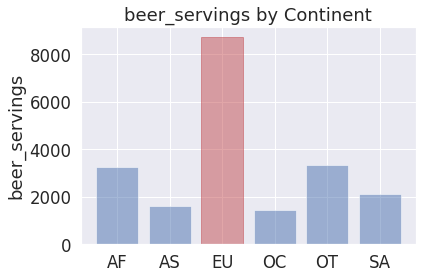

In [ ]:
## drink 데이터프레임에서 대륙(continent)별 맥주소비량(beer_servings)의 합을 구하시오
beer_group = drinks.groupby('continent')['beer_servings'].sum()
print(beer_group)

## beer_group 의 인덱스를 리스트로 변환하시오
continents = beer_group.index.tolist()
print(continents)

## continents 변수의 길이만큼 배열을 만드시오
y_pos = np.arange(len(continents))
print(y_pos)

## beer_group 변수의 값들을 리스트로 변환하시오
alcohol = beer_group.values.tolist()
print(alcohol)
 
## x축은 y_pos, y축은 alcohol으로  막대그래프 객체를 생성하시오.
## 위치는 중앙으로 지정하고 색상은 반투명으로 지정하시오.
bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)

## 막대그래프 객체에서 대륙(continents)의 "EU" 인덱스에 해당하는 막대의 컬러를 red로 지정하시오
bar_list[continents.index("EU")].set_color("r")

# xticks()은 x축 눈금 이름을 지정한다.
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
plt.show()

[4.2] 대륙별 총알코올소비량(total_liters_of_pure_alcohol)을 시각화하기

In [ ]:
## drinks 데이터프레임에서 총 알코올 소비량(total_litres_of_pure_alcohol)의 평균을 구하시오
total_mean = drinks.total_litres_of_pure_alcohol.mean()
print(total_mean)

## drinks 데이터프레임에서 대륙(continent)별 총 알코올 소비량(total_litres_of_pure_alcohol)의 평균을 구하시오
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
print(continent_mean)

4.717098445595855
continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


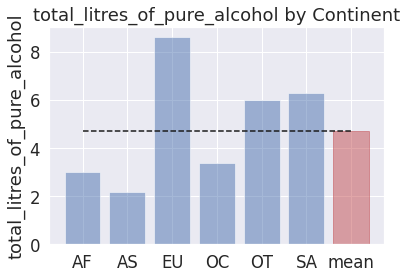

In [ ]:
## continent_mean의 인덱스를 리스트로 변환하시오
continents = continent_mean.index.tolist()

## continents 리스트에 'mean' 컬럼을 추가하시오
continents.append("mean")

## continents 리스트 길이만큼 인덱스 배열을 만드시오
x_pos = np.arange(len(continents))

## continent_mean의 값들을 리스트로 변환하시오
alcohol = continent_mean.values.tolist()

## alcohol 리스트에 total_mean을 추가하시오
alcohol.append(total_mean)

## x축은 x_pos, y축은 alcohol으로  막대그래프 객체를 생성하시오.
## 위치는 중앙으로 지정하고 색상은 반투명으로 지정하시오.
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)

## 막대그래프 객체에서 마지막 원소의 색깔을 red로 지정하시오
bar_list[len(continents) - 1].set_color("r")

## x축[0., 6], y축[total_mean, total_mean]에 검은색 점선을 표시하시오
plt.plot([0., 6], [total_mean, total_mean], "k--")

##  x축 x_pos의 눈금이름을 continents로 지정하시오.
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')
plt.show()

[4.1] 대한민국은 얼마나 술을 독하게 마시는 나라일까?에 대한 탐색 코드 살펴보기

In [ ]:
# 약주(알코올 도수가 낮은)총소비량 total_servings 피처를 추가한다.
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 총알코올소비량을 약주총소비량 나눠서 alcohol_rate 피처를 추가한다.
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']

## alcohol_rate 피처에 NaN 가 있으면 0으로 채우시오
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

## 국가(country)와 알코올비율(alcohol_rate) 피처만 추출하시오
country_with_rank = drinks[['country', 'alcohol_rate']]

## country_with_rank 에서 알코올비율(alcohol_rate) 피처 기준으로 내림차순 정렬하시오
country_with_rank = country_with_rank.sort_values(by=["alcohol_rate"], ascending=0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


[4.2] 국가별 순위 정보를 시각화하기

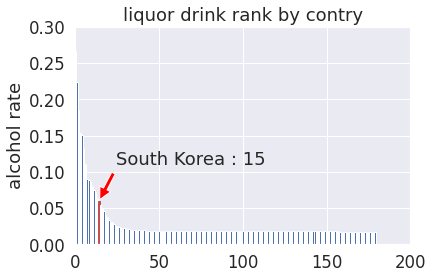

In [ ]:
## country_with_rank 데이터프레임에서 국가 피처를 리스트로 변환하시오
country_list = country_with_rank.country.tolist()

## country_list 의 길이만큼 인덱스 배열을 만드시오
x_pos = np.arange(len(country_list))

## country_with_rank 데이터프레임에서 alcohol_rate 피처를 리스트로 변환하시오
rank = country_with_rank.alcohol_rate.tolist()

## x축 x_pos, y축은 rank로 막대그래프 객체를 생성하시오
bar_list = plt.bar(x_pos, rank)

## 막대그래프 객체에서 South Korea에 대한 컬러를 red로 지정하시오
bar_list[country_list.index("South Korea")].set_color("r")

plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3]) # x, y축 범위지정

## country_list에서 "South Korea" 인덱스(순위)을 구하시오
korea_rank = country_list.index("South Korea")

# country_with_rank 데이터프레임에서 'South Korea'의 alcohol_rate 피처의 값을 가져온다
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]

# 그래프에 'South Korea : 15' 주석과 화살표를 표시한다.
plt.annotate('South Korea : ' + str(korea_rank + 1), # 주석 내용
             xy=(korea_rank, korea_alc_rate), # x,y 좌표값
             xytext=(korea_rank + 10, korea_alc_rate + 0.05), # 주석 내용의 x,y 좌표값
             arrowprops=dict(facecolor='red', shrink=0.05)) # 화살표 속성지정
             # shrink는 텍스트로부터 얼마나 떨어진 위치에서 화살표가 시작하는지 지정한다. 0이 최소 1이 최대 

plt.show()